In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis as mda
import scipy
from matplotlib.lines import Line2D

WT_COL='darkblue'
D7_COL='royalblue'

D4_COL = 'red'
D12_COL = 'orange'

In [9]:
d7_file = '/home/adria/p-test-7.txt'
d12_file = '/home/adria/p-test-12.txt'

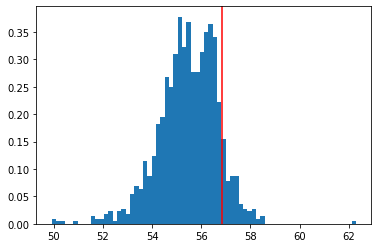

In [28]:
d7data = np.genfromtxt(d7_file)
rgi = d7data[0,2]
plt.hist(d7data[:,0], density=True, bins=70);
plt.axvline(rgi, color='red')

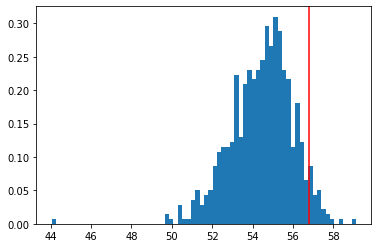

In [30]:
d12data = np.genfromtxt(d12_file)
rgi = d7data[0,2]
plt.hist(d12data[:,0], density=True, bins=70);
plt.axvline(rgi, color='red')